#Лабораторна робота №1
#Студента групи МІТ-31 (підгрупа 2)
#Маніла Дмитра Олексійовича

In [68]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn

#Завдання
1.  NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.
2.  Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))
3.  Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)
4.  Відповіді оформити .ipynb документом
5.  Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab1 де має бути .ipynb файл та необхідні файли з даними

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.NumPy

#Create

In [70]:
array1 = np.arange(0,20,3)
array2 = np.random.randint(20, size=(array1.size))
array1 = np.append(array1,33)
array2 = np.append(array2,15)
print("array1.add(33):", array1)
print("array2.add(15):", array2)


array1.add(33): [ 0  3  6  9 12 15 18 33]
array2.add(15): [ 1  3 12  1  5 18 10 15]


#Update


In [71]:
array1[2] = 22
array2[5] = 92
array1[0] = 15
array2[6] = 13
print("array1:", array1)
print("array2:", array2)


array1: [15  3 22  9 12 15 18 33]
array2: [ 1  3 12  1  5 92 13 15]


#Delete
@mandmit

In [72]:
array1 = np.delete(array1,np.random.randint(array1.size))
array2 = np.delete(array2,np.random.randint(array2.size))
print("array1:", array1)
print("array2:", array2)


array1: [15  3  9 12 15 18 33]
array2: [ 1  3 12  5 92 13 15]


#Scalar


In [73]:
array1 = np.multiply(array1,2)
array2 = np.power(array2,2)
print("array1*2:", array1)
print("array2**2:", array2)


array1*2: [30  6 18 24 30 36 66]
array2**2: [   1    9  144   25 8464  169  225]


#Vector


In [74]:
array3 = np.add(array2,array1)
print("array3=array2+array1:", array3)
array3 = np.subtract(array3,array1)
print("array3-array1:", array3)
array2 = np.subtract(array2,array1)
print("array2-array1:", array2)
print("array1:", array1)


array3=array2+array1: [  31   15  162   49 8494  205  291]
array3-array1: [   1    9  144   25 8464  169  225]
array2-array1: [ -29    3  126    1 8434  133  159]
array1: [30  6 18 24 30 36 66]


#Matrix


In [75]:
size = np.random.randint(1,10)
matrix = np.random.randint(30,size = (size,size))
print("Matrix: ", matrix, sep="\n")


Matrix: 
[[25 21  2]
 [ 8 19 29]
 [27 14  6]]


In [76]:
matrix = np.zeros((size,size))
print("Matrix: ", matrix, sep="\n")
matrix = np.ones((size,size))
print("Matrix: ", matrix, sep="\n")

Matrix: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Matrix: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [77]:
matrix = np.random.randint(30,size = (size,size))
matrix1 = np.random.randint(30,size = (size,size))
print("Matrix: ", matrix, sep="\n")
print("Matrix1: ", matrix1, sep="\n")
print("Matrix-Matrix1: ", matrix-matrix1, sep="\n")
print("Matrix+Matrix1: ", matrix+matrix1, sep="\n")
print("Matrix*Matrix1: ", matrix*matrix1, sep="\n")
print("Matrix/Matrix1: ", matrix/matrix1, sep="\n")

Matrix: 
[[ 7  5  6]
 [18 17  2]
 [12 25 17]]
Matrix1: 
[[21  9  1]
 [20  6 21]
 [19  6 10]]
Matrix-Matrix1: 
[[-14  -4   5]
 [ -2  11 -19]
 [ -7  19   7]]
Matrix+Matrix1: 
[[28 14  7]
 [38 23 23]
 [31 31 27]]
Matrix*Matrix1: 
[[147  45   6]
 [360 102  42]
 [228 150 170]]
Matrix/Matrix1: 
[[0.33333333 0.55555556 6.        ]
 [0.9        2.83333333 0.0952381 ]
 [0.63157895 4.16666667 1.7       ]]


2.Pandas

In [78]:
customers = pd.read_csv("FyntraCustomerData.csv")
customers.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [79]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [80]:
i = 210
while i < 250:
    print(customers.loc[[i],["Email"]])
    i = i+1

                    Email
210  melissa08@nelson.com
                  Email
211  karina59@gmail.com
                              Email
212  baldwinbryan@estrada-silva.biz
                        Email
213  audreyguerrero@carey.com
                  Email
214  drew29@hotmail.com
                   Email
215  michael00@yahoo.com
                    Email
216  jgray@khan-allen.com
                     Email
217  bushsusan@hotmail.com
                 Email
218  charris@gmail.com
                     Email
219  longphillip@yahoo.com
                          Email
220  madisonalexander@gmail.com
                       Email
221  mfoster@brown-white.com
                       Email
222  sanchezkara@hotmail.com
                         Email
223  floresbradley@hotmail.com
                         Email
224  lamryan@curtis-garcia.net
                             Email
225  alexandra26@summers-davis.com
                 Email
226  ocortez@gmail.com
                     Email
227  melinda39@mo

In [81]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [82]:
customers.median()

Avg_Session_Length       33.082008
Time_on_App              11.983231
Time_on_Website          37.069367
Length_of_Membership      3.533975
Yearly_Amount_Spent     498.887875
dtype: float64

In [83]:
print("Max:")
customers.max()


Max:


Email                                    zscott@wright.com
Address                 Unit 7502 Box 8345\r\nDPO AE 53747
Avatar                                         YellowGreen
Avg_Session_Length                               36.139662
Time_on_App                                      15.126994
Time_on_Website                                  40.005182
Length_of_Membership                              6.922689
Yearly_Amount_Spent                             765.518462
dtype: object

In [84]:
print("Min:")
customers.min()

Min:


Email                                                 aaron04@yahoo.com
Address                 0001 Mack Mill\r\nNorth Jennifer, NE 42021-5936
Avatar                                                        AliceBlue
Avg_Session_Length                                            29.532429
Time_on_App                                                    8.508152
Time_on_Website                                               33.913847
Length_of_Membership                                           0.269901
Yearly_Amount_Spent                                          256.670582
dtype: object

3.Matplotlib

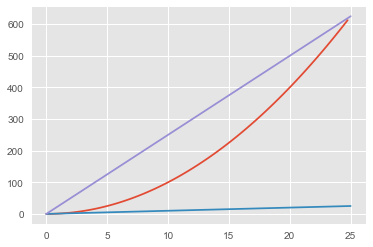

In [134]:
%matplotlib inline
plt.style.use('ggplot')
x_data = []
y_data = []
for i in np.arange(0,25,0.25):
    x_data.append(i)
    y_data.append(i**2)
X = np.linspace(0,25,1000)
Y = X
X1 = np.linspace(0,25,1000)
Y1 = X1*25
fig, ax = plt.subplots()
plt.plot(x_data,y_data,X,Y,X1,Y1)

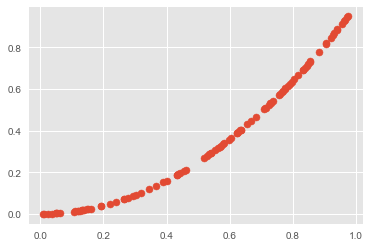

In [136]:
x_data = np.random.random(100)
y_data = x_data**2
plt.scatter(x_data,y_data)

In [137]:
mean = np.mean(x_data)
MAE = [np.abs(real - mean) for real in x_data]
MSE = [np.square(real - mean) for real in x_data]

In [138]:
def yhat(x, y):
    k, b = np.polyfit(x, y, 1)
    y_pred = k*x + b
    return y_pred
y_hat = (yhat(x_data, y_data))

In [140]:
head = np.column_stack((x_data,y_data, y_hat, MAE, MSE))
tbl = pd.DataFrame(head, columns=('X', 'Y', 'Y_Hat', 'MAE', 'MSE'))
print(tbl)

           X         Y     Y_Hat       MAE       MSE
0   0.757443  0.573720  0.592545  0.223130  0.049787
1   0.768518  0.590620  0.603460  0.234205  0.054852
2   0.527351  0.278099  0.365760  0.006962  0.000048
3   0.265290  0.070379  0.107466  0.269023  0.072373
4   0.013230  0.000175 -0.140971  0.521083  0.271528
..       ...       ...       ...       ...       ...
95  0.434321  0.188635  0.274067  0.099992  0.009998
96  0.832776  0.693517  0.666795  0.298463  0.089080
97  0.847471  0.718206  0.681278  0.313157  0.098068
98  0.105608  0.011153 -0.049921  0.428705  0.183788
99  0.724465  0.524850  0.560041  0.190152  0.036158

[100 rows x 5 columns]


In [141]:
tbl.to_csv('data.csv')